In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

companies = pd.read_csv("./companies.txt", encoding = "ISO-8859-1", sep='	')
rounds = pd.read_csv("./rounds2.csv", encoding = "ISO-8859-1")


companies['permalink'] = companies['permalink'].apply(lambda x : x.lower())
rounds['company_permalink'] = rounds['company_permalink'].apply(lambda x : x.lower())

# How many unique companies are present in rounds2?
# company_permalink column has the unique ID's of the company. 
# Getting the count of unique values under company_permalink column will give the no. of unique companies in rounds2
print('Unique companies in rounds table')
print(rounds.loc[:,'company_permalink'].unique().size)

# How many unique companies are present in the companies file?
# permalink column has the unique ID's of the company. 
# Getting the count of unique values under permalink column will give the no. of unique companies in companies file
print('Unique companies in companies table')
print(companies.loc[:,'permalink'].unique().size)

# In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
# 'permalink' column


master_frame = pd.merge(rounds, companies, how='inner', left_on='company_permalink', right_on='permalink')
master_frame.shape

Unique companies in rounds table
66370
Unique companies in companies table
66368


(114942, 16)

In [270]:
by_fund_category = master_frame.groupby('funding_round_type')
print(by_fund_category['raised_amount_usd'].mean().apply(lambda x: format(x, 'f')))
venture_df = master_frame[master_frame['funding_round_type'] == 'venture']

funding_round_type
angel                       958694.469753
convertible_note           1453438.543193
debt_financing            17043526.023047
equity_crowdfunding         538368.210912
grant                      4300576.339454
non_equity_assistance       411203.054795
post_ipo_debt            168704571.822368
post_ipo_equity           82182493.871019
private_equity            73308593.029442
product_crowdfunding       1363131.069948
secondary_market          79649630.100000
seed                        719779.620202
undisclosed               19242370.225664
venture                   11748949.129490
Name: raised_amount_usd, dtype: object


In [273]:
country_cat = venture_df.groupby('country_code')

# Sorting the countries on amount of funds raised give the top 9 countries
print(country_cat['raised_amount_usd'].sum().sort_values(ascending=False))


# Top 9 countries which have received the highest total funding for 'venture' investment type
top9 = venture_df[venture_df['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN'])]

# Out of the 9 countries the top 3 english speaking countries are 'USA', 'GBR' and 'IND'
top3 = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
SWE    3.254953e+09
NLD    2.939404e+09
CHE    2.827560e+09
SGP    2.793918e+09
ESP    1.835831e+09
BRA    1.785987e+09
IRL    1.676131e+09
RUS    1.570426e+09
AUS    1.322935e+09
DNK    1.228311e+09
BEL    1.070542e+09
FIN    1.043200e+09
NOR    9.561924e+08
KOR    9.399883e+08
MYS    8.830588e+08
HKG    7.812670e+08
AUT    6.309550e+08
TWN    6.239795e+08
TUR    5.590975e+08
ITA    4.882894e+08
NZL    4.483164e+08
           ...     
GRC    1.074378e+07
BAH    8.900000e+06
TTO    8.500000e+06
SVK    8.241062e+06
BGD    7.002000e+06
LBN    6.455000e+06
GGY    3.960000e+06
TUN    3.920000e+06
SEN    2.860000e+06
HRV    2.633669e+06
UGA    2.500000e+06
PER    2.469270e+06
BWA    2.250000e+06
PAN    2.100000e+06
LAO    2.100000e+06
MAR    1.600000e+06
MUS    1.500000e+06
PRI    1.441901e+06
ECU    

In [283]:
top3['category_list'] = top3['category_list'].apply(lambda x : str(x).lower())
top3['primary_sector'] = top3['category_list'].apply(lambda x: str(x).split("|")[0])

# load the 'mappings.csv' file
main_sector = pd.read_csv("./mapping.csv", encoding = "ISO-8859-1")

# Rearrange the table to get a table between 'category_list' and 'main_sector'
main_sector = pd.melt(main_sector, id_vars=['category_list'], var_name = 'main_sector')
main_sector = main_sector[main_sector['value'] == 1].drop('value', axis = 1)
main_sector['category_list'] = main_sector['category_list'].apply(lambda x : str(x).lower())

# the final main_sector table
print(main_sector)

merged_top3 = pd.merge(top3, main_sector, how='inner', on='category_list')
print(merged_top3.shape)


                 category_list                              main_sector
8             adventure travel                      Automotive & Sports
14                   aerospace                      Automotive & Sports
45                        auto                      Automotive & Sports
46             automated kiosk                      Automotive & Sports
47                  automotive                      Automotive & Sports
57                    bicycles                      Automotive & Sports
69            boating industry                      Automotive & Sports
87                         cad                      Automotive & Sports
93                        cars                      Automotive & Sports
188                     design                      Automotive & Sports
189                  designers                      Automotive & Sports
213                     drones                      Automotive & Sports
226          electric vehicles                      Automotive &

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [299]:
d1 = merged_top3[(merged_top3['raised_amount_usd'] >= 5000000) & (merged_top3['raised_amount_usd'] <= 15000000) & (merged_top3['country_code'] == 'USA')]
print('Total no. of investments in USA')
print(d1['company_permalink'].count())

d2 = merged_top3[(merged_top3['raised_amount_usd'] >= 5000000) & (merged_top3['raised_amount_usd'] <= 15000000) & (merged_top3['country_code'] == 'GBR')]
print('Total no. of investments in GBR')
print(d2['company_permalink'].count())

d3 = merged_top3[(merged_top3['raised_amount_usd'] >= 5000000) & (merged_top3['raised_amount_usd'] <= 15000000) & (merged_top3['country_code'] == 'IND')]
print('Total no. of investments in IND')
print(d3['company_permalink'].count())

print('\n')
print('Total amount of investments in USA')
print(d1['raised_amount_usd'].sum())
print('Total amount of investments in GBR')
print(d2['raised_amount_usd'].sum())
print('Total amount of investments in IND')
print(d3['raised_amount_usd'].sum())


print('\nNo. of investments in various sectors in USA')
print(d1.groupby('main_sector')['permalink'].count())
print('\nNo. of investments in various sectors in GBR')
print(d2.groupby('main_sector')['permalink'].count())
print('\nNo. of investments in various sectors in IND')
print(d3.groupby('main_sector')['permalink'].count())

# sorting the fund raised according to the top best sector gives the top most funded company in that category
print(d1[d1['main_sector'] == 'Others'].sort_values(by='raised_amount_usd', ascending=False))
print(d2[d2['main_sector'] == 'Cleantech / Semiconductors'].sort_values(by='raised_amount_usd', ascending=False))
print(d3[d3['main_sector'] == 'Others'].sort_values(by='raised_amount_usd', ascending=False))

# sorting the fund raised according to the second best sector gives the top most funded company in that category
print(d1[d1['main_sector'] == 'Cleantech / Semiconductors'].sort_values(by='raised_amount_usd', ascending=False))
print(d2[d2['main_sector'] == 'Others'].sort_values(by='raised_amount_usd', ascending=False))
print(d3[d3['main_sector'] == 'News, Search and Messaging'].sort_values(by='raised_amount_usd', ascending=False))


Total no. of investments in USA
6035
Total no. of investments in GBR
344
Total no. of investments in IND
175


Total amount of investments in USA
54037078804.0
Total amount of investments in GBR
3029216305.0
Total amount of investments in IND
1544298277.0

No. of investments in various sectors in USA
main_sector
Automotive & Sports                          40
Blanks                                       86
Cleantech / Semiconductors                 1737
Entertainment                               196
Health                                      601
Manufacturing                               411
News, Search and Messaging                  552
Others                                     2069
Social, Finance, Analytics, Advertising     343
Name: permalink, dtype: int64

No. of investments in various sectors in GBR
main_sector
Automotive & Sports                          3
Blanks                                       7
Cleantech / Semiconductors                 107
Entertainment            

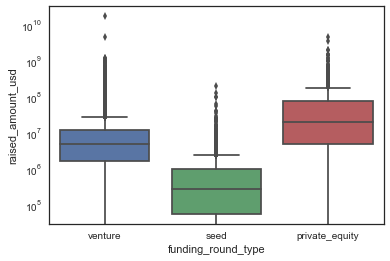

In [300]:
sns.set(style="white")
venture_seed_private_df = master_frame[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'private_equity') | (master_frame['funding_round_type'] == 'seed')  ]
# plotting the fund type against the amount of fund raised (for 'venture', 'private_equity' and 'seed') clearly shows that 'venture' is the right fund type for Spark Funds
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=venture_seed_private_df)
plt.yscale('log')
plt.show()